# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style='whitegrid')
pd.set_option('display.max_columns', 32)

In [2]:
bookings = pd.read_csv('processed_hotel_bookings.csv')
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,-1.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data profile

In [3]:
#Using describe to inspect numeric columns
bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87389.0,0.274920,0.446477,0.00,0.0,0.0,1.0,1.0
lead_time,87389.0,79.897195,86.053274,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87389.0,2016.210313,0.686094,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87389.0,26.837760,13.674352,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87389.0,15.815698,8.835244,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87389.0,1.005321,1.031935,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87389.0,2.625548,2.053591,0.00,1.0,2.0,4.0,50.0
adults,87389.0,1.875842,0.626490,0.00,2.0,2.0,2.0,55.0
children,87389.0,0.138644,0.455888,0.00,0.0,0.0,0.0,10.0
babies,87389.0,0.010825,0.113601,0.00,0.0,0.0,0.0,10.0


In [4]:
#I'll be looking into outliers later. From describe() it looks like I'll have to check:
#lead_time, stays_in_week_nights, adults, previous_cancellations, previous_bookings_not_canceled, booking_changes, 
#days_in_waiting_list and adr

In [5]:
#let's see how the histograms of the numeric columns look like
numeric_cols = list(bookings.select_dtypes(include=[np.number]).columns)
print(numeric_cols)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [6]:
#The agent column is simply showing numeric id's, not need to include it
numeric_cols.remove('agent')

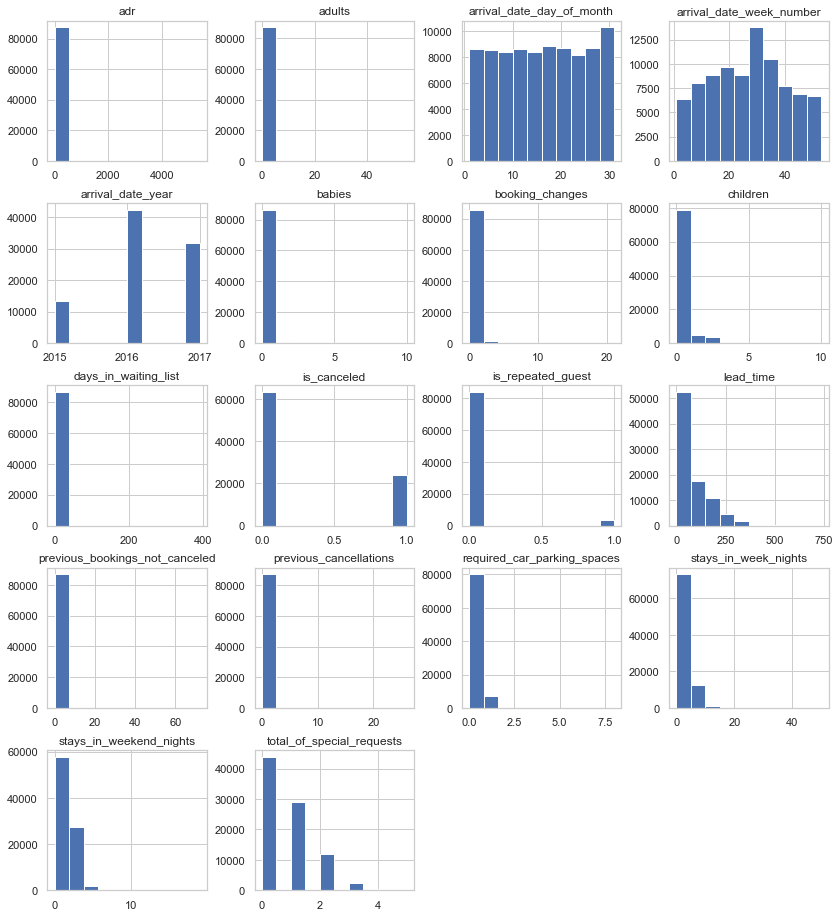

In [7]:
bookings[numeric_cols].hist(figsize=(14,16))
plt.show()

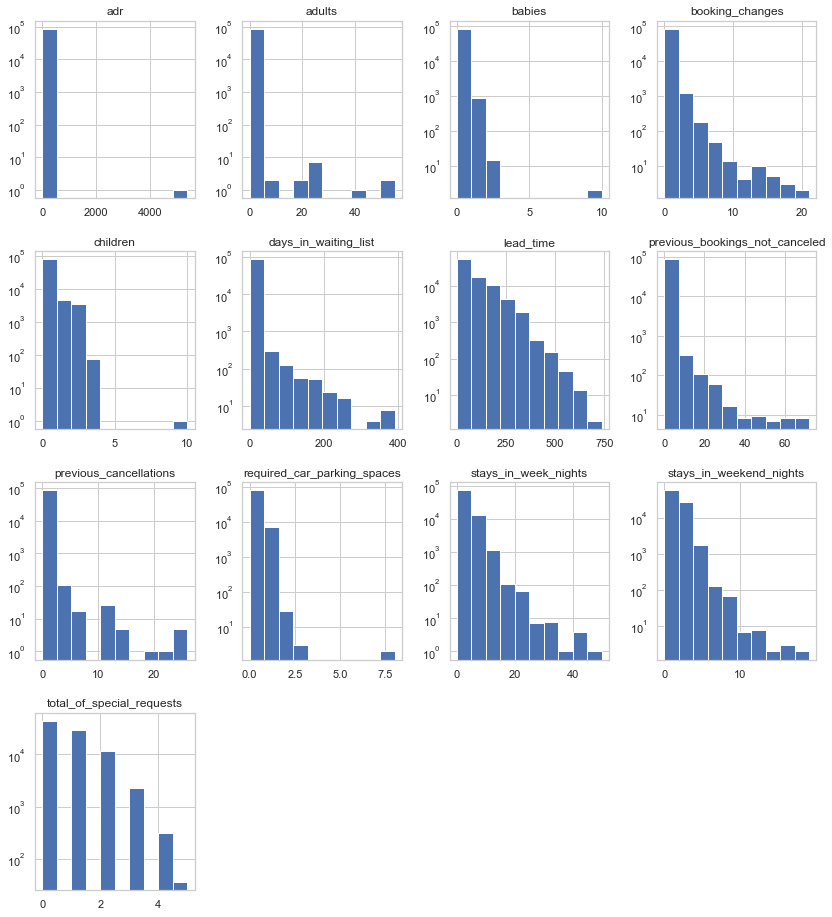

In [8]:
#Not getting a lot here, trying the log scale for the heavily skewed columns
bookings[['adr', 'adults', 'babies', 'booking_changes', 'children', 'days_in_waiting_list', 'lead_time', 'previous_bookings_not_canceled', 'previous_cancellations', 'required_car_parking_spaces', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_of_special_requests']].hist(log=True, figsize=(14,16))
plt.show()

stays_in_wee_nights and stays_in_weekend_nights are helpful. They show how most stays are short, but there have been longer stays. lead_time is also interesting. Most reservations were made with little time in advance, but others were made well over a year in advance.

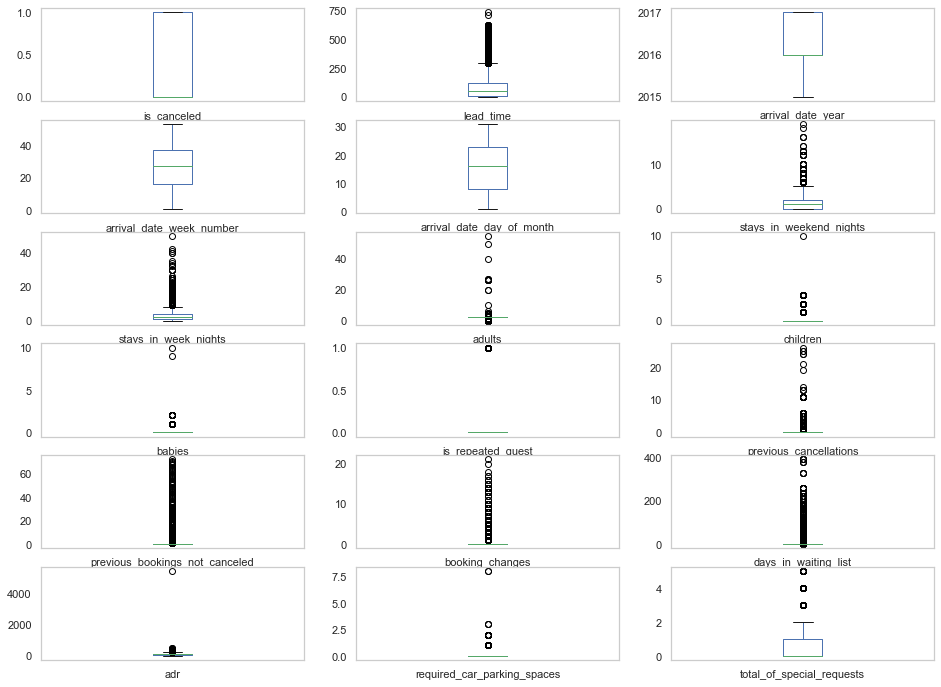

In [9]:
#Looking into outliers
bookings[numeric_cols].plot(kind='box', grid=False, subplots=True, layout=(6,3), figsize=(16,12))
plt.show()

Looks like I was on the right track and the columns to look into are:
lead_time, stays_in_week_nights, adults, previous_cancellations, previous_bookings_not_canceled, booking_changes, days_in_waiting_list and adr.

In [10]:
#Seeing how many of my observations contain a technical outlier
q1 = bookings.quantile(0.25)
q3 = bookings.quantile(0.75)
iqr = q3-q1
bookings[((bookings < (q1 - 1.5 * iqr))| (bookings > (q3 + 1.5 * iqr))).any(axis=1)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,-1.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,-1.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,-1.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
11,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,0,Transient,97.00,0,3,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87372,City Hotel,0,175,2017,August,35,31,1,3,1,0.0,0,BB,NLD,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,0,Transient,82.35,0,1,Check-Out,2017-09-04
87375,City Hotel,0,165,2017,August,35,29,1,5,3,0.0,0,BB,AUT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,209.25,0,3,Check-Out,2017-09-04
87381,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,0,Transient,209.00,0,0,Check-Out,2017-09-05
87385,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07


In [11]:
#That's more than half of my dataset. Probably need to look into columns individually

In [12]:
#Taking a look at lead_time. It seems like making reservations with more than 6 months in advance isn't that strange.
bookings[bookings['lead_time'] > bookings['lead_time'].quantile(0.75)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,-1.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,-1.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
22,Resort Hotel,0,127,2015,July,27,1,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,I,0,No Deposit,115.0,0,Contract,94.95,0,1,Check-Out,2015-07-01
78,Resort Hotel,1,368,2015,July,27,3,3,7,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,40.0,0,Contract,55.68,0,0,Canceled,2015-05-19
79,Resort Hotel,0,364,2015,July,27,3,3,7,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,40.0,0,Contract,55.68,0,0,Check-Out,2015-07-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87377,City Hotel,0,247,2017,August,35,31,1,3,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,0,Transient,86.85,0,0,Check-Out,2017-09-04
87380,City Hotel,0,188,2017,August,35,31,2,3,2,0.0,0,BB,DEU,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,0,Transient,99.00,0,0,Check-Out,2017-09-05
87381,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,0,Transient,209.00,0,0,Check-Out,2017-09-05
87382,City Hotel,0,164,2017,August,35,31,2,4,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,42.0,0,Transient,87.60,0,0,Check-Out,2017-09-06


In [13]:
# After exploring adr it looks like only two bookings have serious mistakes on them, one negative and one in the thousands
#for a single stay. Getting rid of them
bookings = bookings[~(bookings['adr']<0) & ~(bookings['adr']>510)]

In [14]:
#The other thing I wanted to check regarding adr was the reservations that have 0.0 for it. 
#Looking at market_segment shows that there is a 'Complementary' segment. Are all the 0.0 adr reservations complementary?
print(bookings['market_segment'].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [18]:
bookings[bookings['adr']==0]['market_segment'].value_counts()

Complementary    640
Online TA        352
Offline TA/TO    260
Direct           227
Groups           220
Corporate         74
Aviation           5
Name: market_segment, dtype: int64

In [19]:
#Looks like Complementary is the biggest group of 0 adr reservations, but most of them come from other segments

In [20]:
bookings[(bookings['adr']==0) & (bookings['market_segment']=='Complementary')] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
122,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,-1.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1618,Resort Hotel,0,3,2015,September,37,10,0,1,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,C,H,0,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2101,Resort Hotel,0,13,2015,October,41,7,0,2,2,0.0,0,FB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,-1.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2103,Resort Hotel,0,0,2015,October,41,7,0,1,3,0.0,0,BB,AGO,Complementary,Direct,0,0,0,A,C,1,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2262,Resort Hotel,0,1,2015,October,42,16,0,1,1,0.0,0,HB,PRT,Complementary,Direct,0,0,0,E,D,0,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2015-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85371,City Hotel,0,85,2017,July,30,27,0,2,2,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,1,No Deposit,-1.0,0,Transient,0.0,0,1,Check-Out,2017-07-29
85452,City Hotel,0,4,2017,July,30,29,0,1,2,2.0,0,BB,PRT,Complementary,Direct,0,0,0,E,E,0,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2017-07-30
85551,City Hotel,0,0,2017,July,31,31,1,0,1,0.0,0,BB,PRT,Complementary,Direct,0,0,0,D,D,0,No Deposit,-1.0,0,Transient,0.0,0,0,Check-Out,2017-08-01
86924,City Hotel,0,1,2017,August,34,24,0,1,2,1.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,1,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-08-25


In [21]:
#Looks like there isn't any good explanation for most of the zero adr reservtions. Dropping all the non Complementary
zero = bookings[(bookings['adr']==0) & (bookings['market_segment']!='Complementary')]
bookings = bookings.drop(zero.index).reset_index(drop=True)

In [22]:
#Exploring how removing those rows impacted the other columns
bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86249.0,0.277360,0.447698,0.0,0.00,0.0,1.0,1.0
lead_time,86249.0,80.205162,85.841591,0.0,12.00,50.0,125.0,709.0
arrival_date_year,86249.0,2016.214576,0.684645,2015.0,2016.00,2016.0,2017.0,2017.0
arrival_date_week_number,86249.0,26.811963,13.652738,1.0,16.00,27.0,37.0,53.0
arrival_date_day_of_month,86249.0,15.819209,8.837256,1.0,8.00,16.0,23.0,31.0
stays_in_weekend_nights,86249.0,1.012429,1.027307,0.0,0.00,1.0,2.0,19.0
stays_in_week_nights,86249.0,2.643613,2.034963,0.0,1.00,2.0,4.0,50.0
adults,86249.0,1.877888,0.504501,0.0,2.00,2.0,2.0,4.0
children,86249.0,0.139538,0.457239,0.0,0.00,0.0,0.0,10.0
babies,86249.0,0.010899,0.114045,0.0,0.00,0.0,0.0,10.0


In [19]:
#The box plots showed that many outliers were on the higher end 
def top(column):
    return bookings[column].quantile(0.75) + ((bookings[column].quantile(0.75) - bookings[column].quantile(0.25))*1.5)

In [23]:
#Looks like someone actually stayed for two months at the resort
bookings[bookings['stays_in_week_nights']==bookings['stays_in_week_nights'].max()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
10687,Resort Hotel,0,126,2016,July,28,5,19,50,1,0.0,0,HB,Undisclosed,Direct,Direct,0,0,1,E,E,2,No Deposit,-1.0,0,Transient,110.0,0,3,Check-Out,2016-09-12


In [24]:
#Looking into_previous cancellations. Seeing if there's any relationship between the recorded cancellations and the agent id's
bookings['agent'][(bookings['previous_cancellations']!=0) & (bookings['agent']!=-1)]

10828    250.0
11025    240.0
11026    240.0
11174    314.0
11176    314.0
         ...  
61483     94.0
61484     94.0
61485     94.0
61486     94.0
63282      9.0
Name: agent, Length: 1020, dtype: float64

In [25]:
bookings[bookings['previous_cancellations'] > 1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
10601,Resort Hotel,0,4,2015,October,44,30,0,2,2,0.0,0,BB,Undisclosed,Corporate,Corporate,0,2,2,A,E,1,No Deposit,-1.0,0,Transient,40.0,1,2,Check-Out,2015-11-01
10602,Resort Hotel,0,0,2015,December,51,15,0,1,1,0.0,0,BB,Undisclosed,Corporate,Corporate,0,2,3,A,A,0,No Deposit,-1.0,0,Transient,35.0,0,2,Check-Out,2015-12-16
10603,Resort Hotel,0,1,2016,January,4,19,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,2,4,A,E,0,No Deposit,-1.0,0,Transient,30.0,0,2,Check-Out,2016-01-20
10604,Resort Hotel,0,0,2016,June,26,20,1,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,2,5,A,D,0,No Deposit,-1.0,0,Transient,63.0,1,2,Check-Out,2016-06-22
10605,Resort Hotel,0,1,2016,November,46,9,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,2,6,A,H,0,No Deposit,-1.0,0,Transient,30.0,1,2,Check-Out,2016-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65521,City Hotel,0,1,2017,July,28,12,0,1,1,0.0,0,BB,PRT,Complementary,Direct,1,5,17,A,A,0,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-07-13
65522,City Hotel,0,0,2017,August,31,1,0,1,1,0.0,0,BB,PRT,Complementary,Direct,1,5,18,A,A,0,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-08-02
65523,City Hotel,0,1,2017,August,32,8,0,1,1,0.0,0,BB,PRT,Complementary,Direct,1,5,19,A,C,1,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-08-09
65524,City Hotel,0,0,2017,August,33,15,0,1,1,0.0,0,BB,PRT,Complementary,Direct,1,5,20,A,A,0,No Deposit,-1.0,0,Transient,0.0,0,3,Check-Out,2017-08-16


I think the issue with previous_cancellations and previous_not_canceled is that these columns are recording a tally for 
travel agents or companies, based on the agent id column, that might have canceled more than once for different individuals. I don't think there's actually one person that has canceled his/her reservation up uo 26 times. If that's the case then these are
legitimate numbers and not errors.

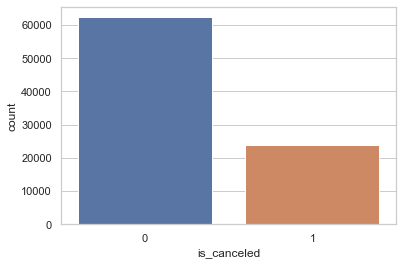

In [26]:
# Moving on to categorical variables
#Looking into the is_canceled column
sns.countplot(x='is_canceled', data=bookings)
plt.show()

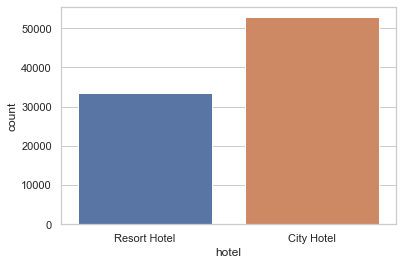

In [27]:
#Seeing how the reservations are split between city and resort
sns.countplot(x='hotel', data=bookings)
plt.show()

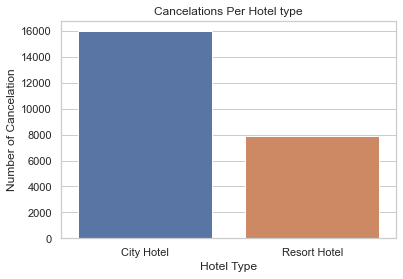

In [32]:
#Seeing how the cancelations are dsitributed across hotel types
hc = pd.DataFrame(bookings[bookings['is_canceled']==1].groupby([ 'hotel'])['is_canceled'].sum()).reset_index()
sns.barplot(x='hotel', y='is_canceled', data=hc)
plt.title('Cancelations Per Hotel type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Cancelation')
plt.show()

In [33]:
#So far it looks like the City hotel gets more reservations than the resort hotel. The higher number of reservations 
#explains the higher number of cancellations

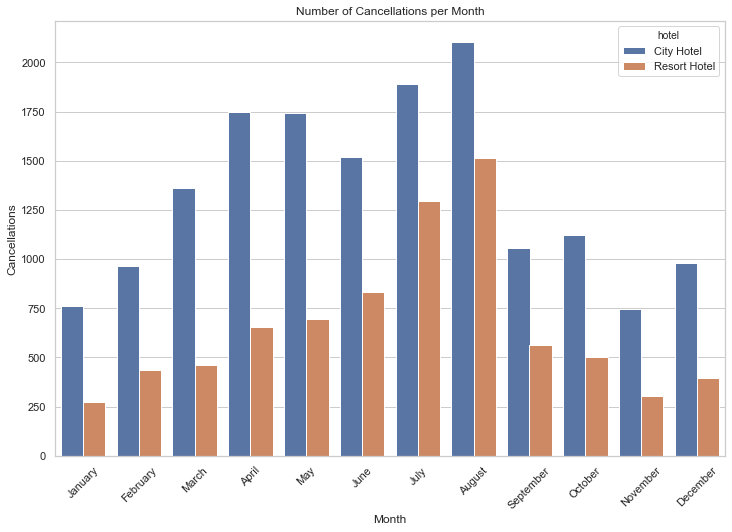

In [34]:
#Cancellations per month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancellations = pd.DataFrame(bookings[bookings['is_canceled']==1].groupby(['arrival_date_month', 'hotel'])['is_canceled'].sum()).reset_index()
cancellations['arrival_date_month'] = pd.Categorical(cancellations['arrival_date_month'], categories=months, ordered=True)
cancellations.sort_values('arrival_date_month', inplace=True)

plt.figure(figsize=(12,8))
sns.barplot(x='arrival_date_month', y='is_canceled', hue='hotel', data=cancellations)
plt.title('Number of Cancellations per Month')
plt.xlabel('Month')
plt.ylabel('Cancellations')
plt.xticks(rotation=45)
plt.show()

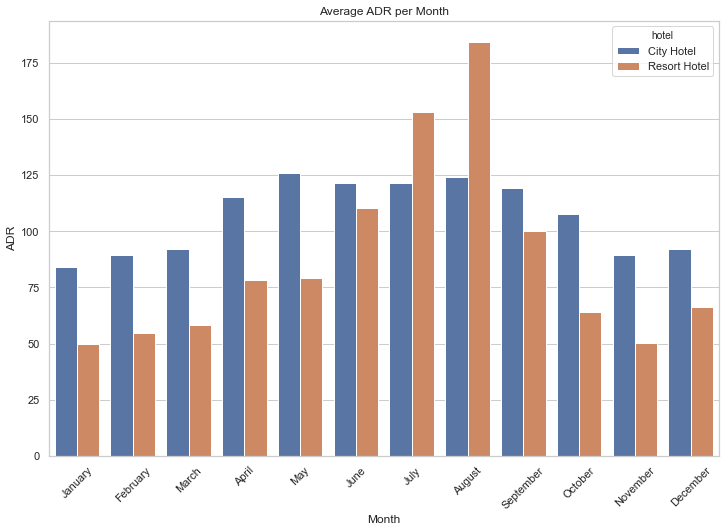

In [35]:
#Average adr per month. I'm going to be using only the reservations that didn't cancel
monthly_adr = pd.DataFrame(bookings[bookings['is_canceled']==0].groupby(['arrival_date_month','hotel'])['adr'].mean()).reset_index()
monthly_adr['arrival_date_month'] = pd.Categorical(monthly_adr['arrival_date_month'], categories=months, ordered=True)
monthly_adr.sort_values('arrival_date_month', inplace=True)

plt.figure(figsize=(12,8))
sns.barplot(x='arrival_date_month', y='adr', hue='hotel', data=monthly_adr)
plt.title('Average ADR per Month')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.show()

The summer months represent the high season for the resort, wich makes sense. The city hotel seems to be steady from April to September, only seeing a downturn in the fall and winter months. It'd be interesting to see the how many people showed up each month.

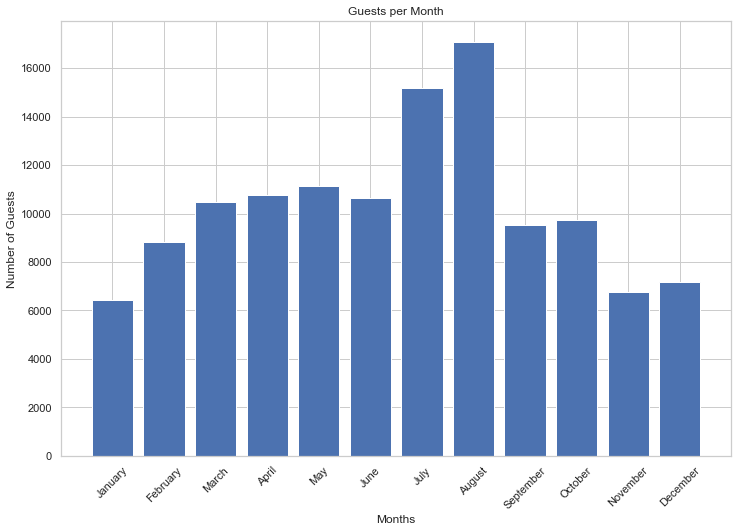

In [36]:
#Guests per month
people = bookings[bookings['is_canceled']==0].groupby(['arrival_date_month'])[['adults', 'children', 'babies']].sum().reset_index()
people['Total Guests'] = people.sum(axis=1)
people['arrival_date_month'] = pd.Categorical(people['arrival_date_month'], categories=months, ordered=True)
people.sort_values('arrival_date_month', inplace=True)

plt.figure(figsize=(12,8))
plt.bar(people['arrival_date_month'], people['Total Guests'])
plt.title('Guests per Month')
plt.xlabel('Months')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.show()

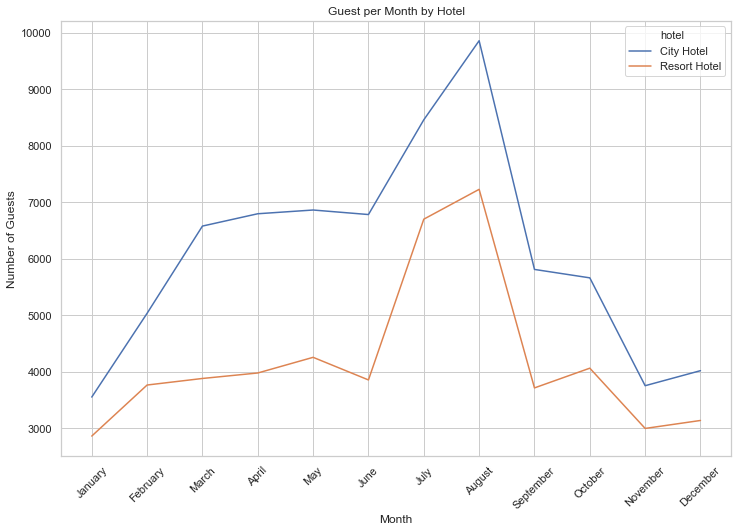

In [37]:
#Interested in seeing how different the number of guests is when separated by hotel
guests = bookings[bookings['is_canceled']==0].groupby(['arrival_date_month', 'hotel'])[['adults', 'children', 'babies']].sum().reset_index()
guests['Total_Guests'] = guests.sum(axis=1)
guests
guests['arrival_date_month'] = pd.Categorical(guests['arrival_date_month'], categories=months, ordered=True)
guests.sort_values('arrival_date_month', inplace=True)

plt.figure(figsize=(12,8))
sns.lineplot(x='arrival_date_month', y='Total_Guests', hue='hotel', data=guests)
plt.title('Guest per Month by Hotel')
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.show()

It looks like the city hotel recieves more guests throughout the year. Again explaining the higher number of cancellations. Interesting to see how even thought the price stays relatively the same for the city hotel throughout the summer, the number of guests they recieve spikes during this season.

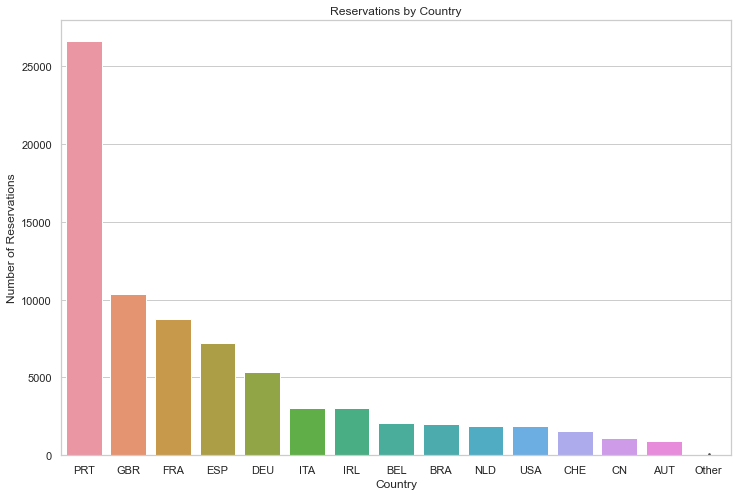

In [38]:
#Seeing where people who make reservations come from
countries = pd.DataFrame(bookings['country'].value_counts()).reset_index()
countries.rename(columns={'index':'country', 'country':'reservations'}, inplace=True)
countries['percentage'] = countries['reservations']/countries['reservations'].sum()
countries
countries.loc[countries['percentage'] < 0.01, 'country'] = 'Other'

plt.figure(figsize=(12,8))
sns.barplot(x='country', y='reservations', data=countries)
plt.title('Reservations by Country')
plt.xlabel('Country')
plt.ylabel('Number of Reservations')
plt.show()

Looks like these hotels are freqented by the local population. The rest of the reservations seem to come mostly from Europe

In [45]:
#Now I'm going to look into how these rervations are made. 
market = pd.DataFrame(bookings['market_segment'].value_counts()).reset_index()
fig = px.pie(market, values='market_segment', names='index', title='Market Segments', template='seaborn')
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

Looks like the overwhelming majority of the reservations are made through booking websites and travel agengencies

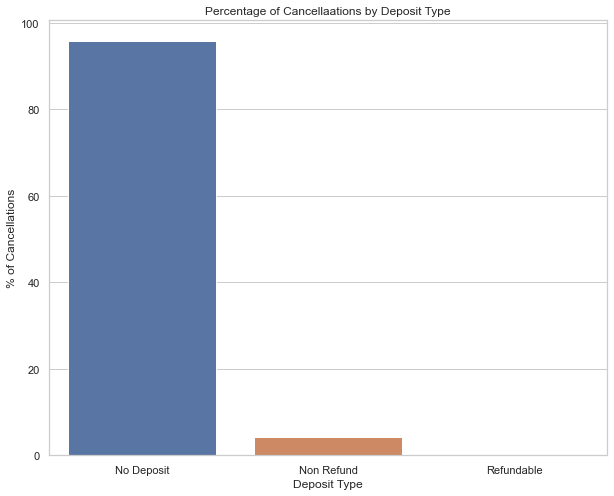

In [54]:
#The next variable I want to look into is deposit_type. I want to see how the time of the payment reflects on the number of 
#cancellations

payment = pd.DataFrame(bookings[bookings['is_canceled']==1].groupby('deposit_type')['is_canceled'].sum()).reset_index()
payment['percent'] = (payment['is_canceled']/payment['is_canceled'].sum()) * 100

plt.figure(figsize=(10,8))
sns.barplot(x='deposit_type', y='percent', data=payment)
plt.title('Percentage of Cancellaations by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('% of Cancellations')
plt.show()

In [55]:
#Of all the cancelled reservations 95% percent of them were reservations where no deposit was made prior to arrival

In [57]:
#Before moving on I'm deleting the distribution_channel column. The information is almost the same as market_segment
bookings.drop(columns='distribution_channel', inplace=True)

In [62]:
#Turning the hotel column into binary 1 for City Hotel and 0 for Resort Hotel

bookings['hotel'] = bookings['hotel'].apply(lambda x: 1 if x == 'City Hotel' else 0)

I want to take a closer look at the correlations between my numeric variable. Most of them are discrete variables, curious to see if I can find anything useful.

In [63]:
#Numeric columns
numeric_cols = list(bookings.select_dtypes(include=[np.number]).columns)

In [64]:
bookings[numeric_cols].corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,1.000000,0.071228,-0.032312,0.080214,-0.018545,-0.008705,-0.166765,-0.221798,0.016029,-0.018601,-0.038970,-0.047749,0.017814,0.005835,-0.044913,-0.692713,0.035689,0.110157,-0.218152,0.018069
is_canceled,0.071228,1.000000,0.183897,0.087301,0.002428,0.005433,0.057646,0.079903,0.084195,0.067174,-0.021055,-0.084772,0.050763,-0.052479,-0.092761,0.000240,0.005143,0.126251,-0.186144,-0.122807
lead_time,-0.032312,0.183897,1.000000,0.140769,0.101816,0.010207,0.234257,0.311522,0.148928,0.029159,-0.003523,-0.140123,0.005045,-0.079591,0.079341,0.079982,0.131061,0.018891,-0.087647,0.035047
arrival_date_year,0.080214,0.087301,0.140769,1.000000,-0.512621,-0.010034,0.001665,-0.000452,0.058372,0.040429,-0.023715,0.027845,-0.054647,0.026992,0.009034,-0.002039,-0.027074,0.180432,-0.042510,0.062545
arrival_date_week_number,-0.018545,0.002428,0.101816,-0.512621,1.000000,0.093831,0.028887,0.030291,0.025956,0.014433,0.014370,-0.041365,0.006934,-0.021120,0.014024,0.019497,0.012035,0.113114,0.010290,0.047910
arrival_date_day_of_month,-0.008705,0.005433,0.010207,-0.010034,0.093831,1.000000,-0.017294,-0.029017,0.003903,0.015836,-0.000242,-0.002999,-0.008604,0.000110,0.006756,0.005279,0.004662,0.022621,0.009086,-0.001357
stays_in_weekend_nights,-0.166765,0.057646,0.234257,0.001665,0.028887,-0.017294,1.000000,0.546521,0.104717,0.028100,0.013787,-0.098268,-0.021063,-0.057568,0.032534,0.161670,-0.032621,0.029392,-0.044893,0.031341
stays_in_week_nights,-0.221798,0.079903,0.311522,-0.000452,0.030291,-0.029017,0.546521,1.000000,0.114896,0.029870,0.016137,-0.101270,-0.019450,-0.059767,0.064280,0.195054,0.000687,0.041094,-0.046640,0.036816
adults,0.016029,0.084195,0.148928,0.058372,0.025956,0.003903,0.104717,0.114896,1.000000,0.028681,0.020310,-0.209107,-0.051820,-0.150622,-0.045203,0.038722,-0.015547,0.329675,0.009290,0.142334
children,-0.018601,0.067174,0.029159,0.040429,0.014433,0.015836,0.028100,0.029870,0.028681,1.000000,0.017306,-0.044303,-0.019261,-0.029511,0.033852,0.041986,-0.020168,0.352543,0.035729,0.043636


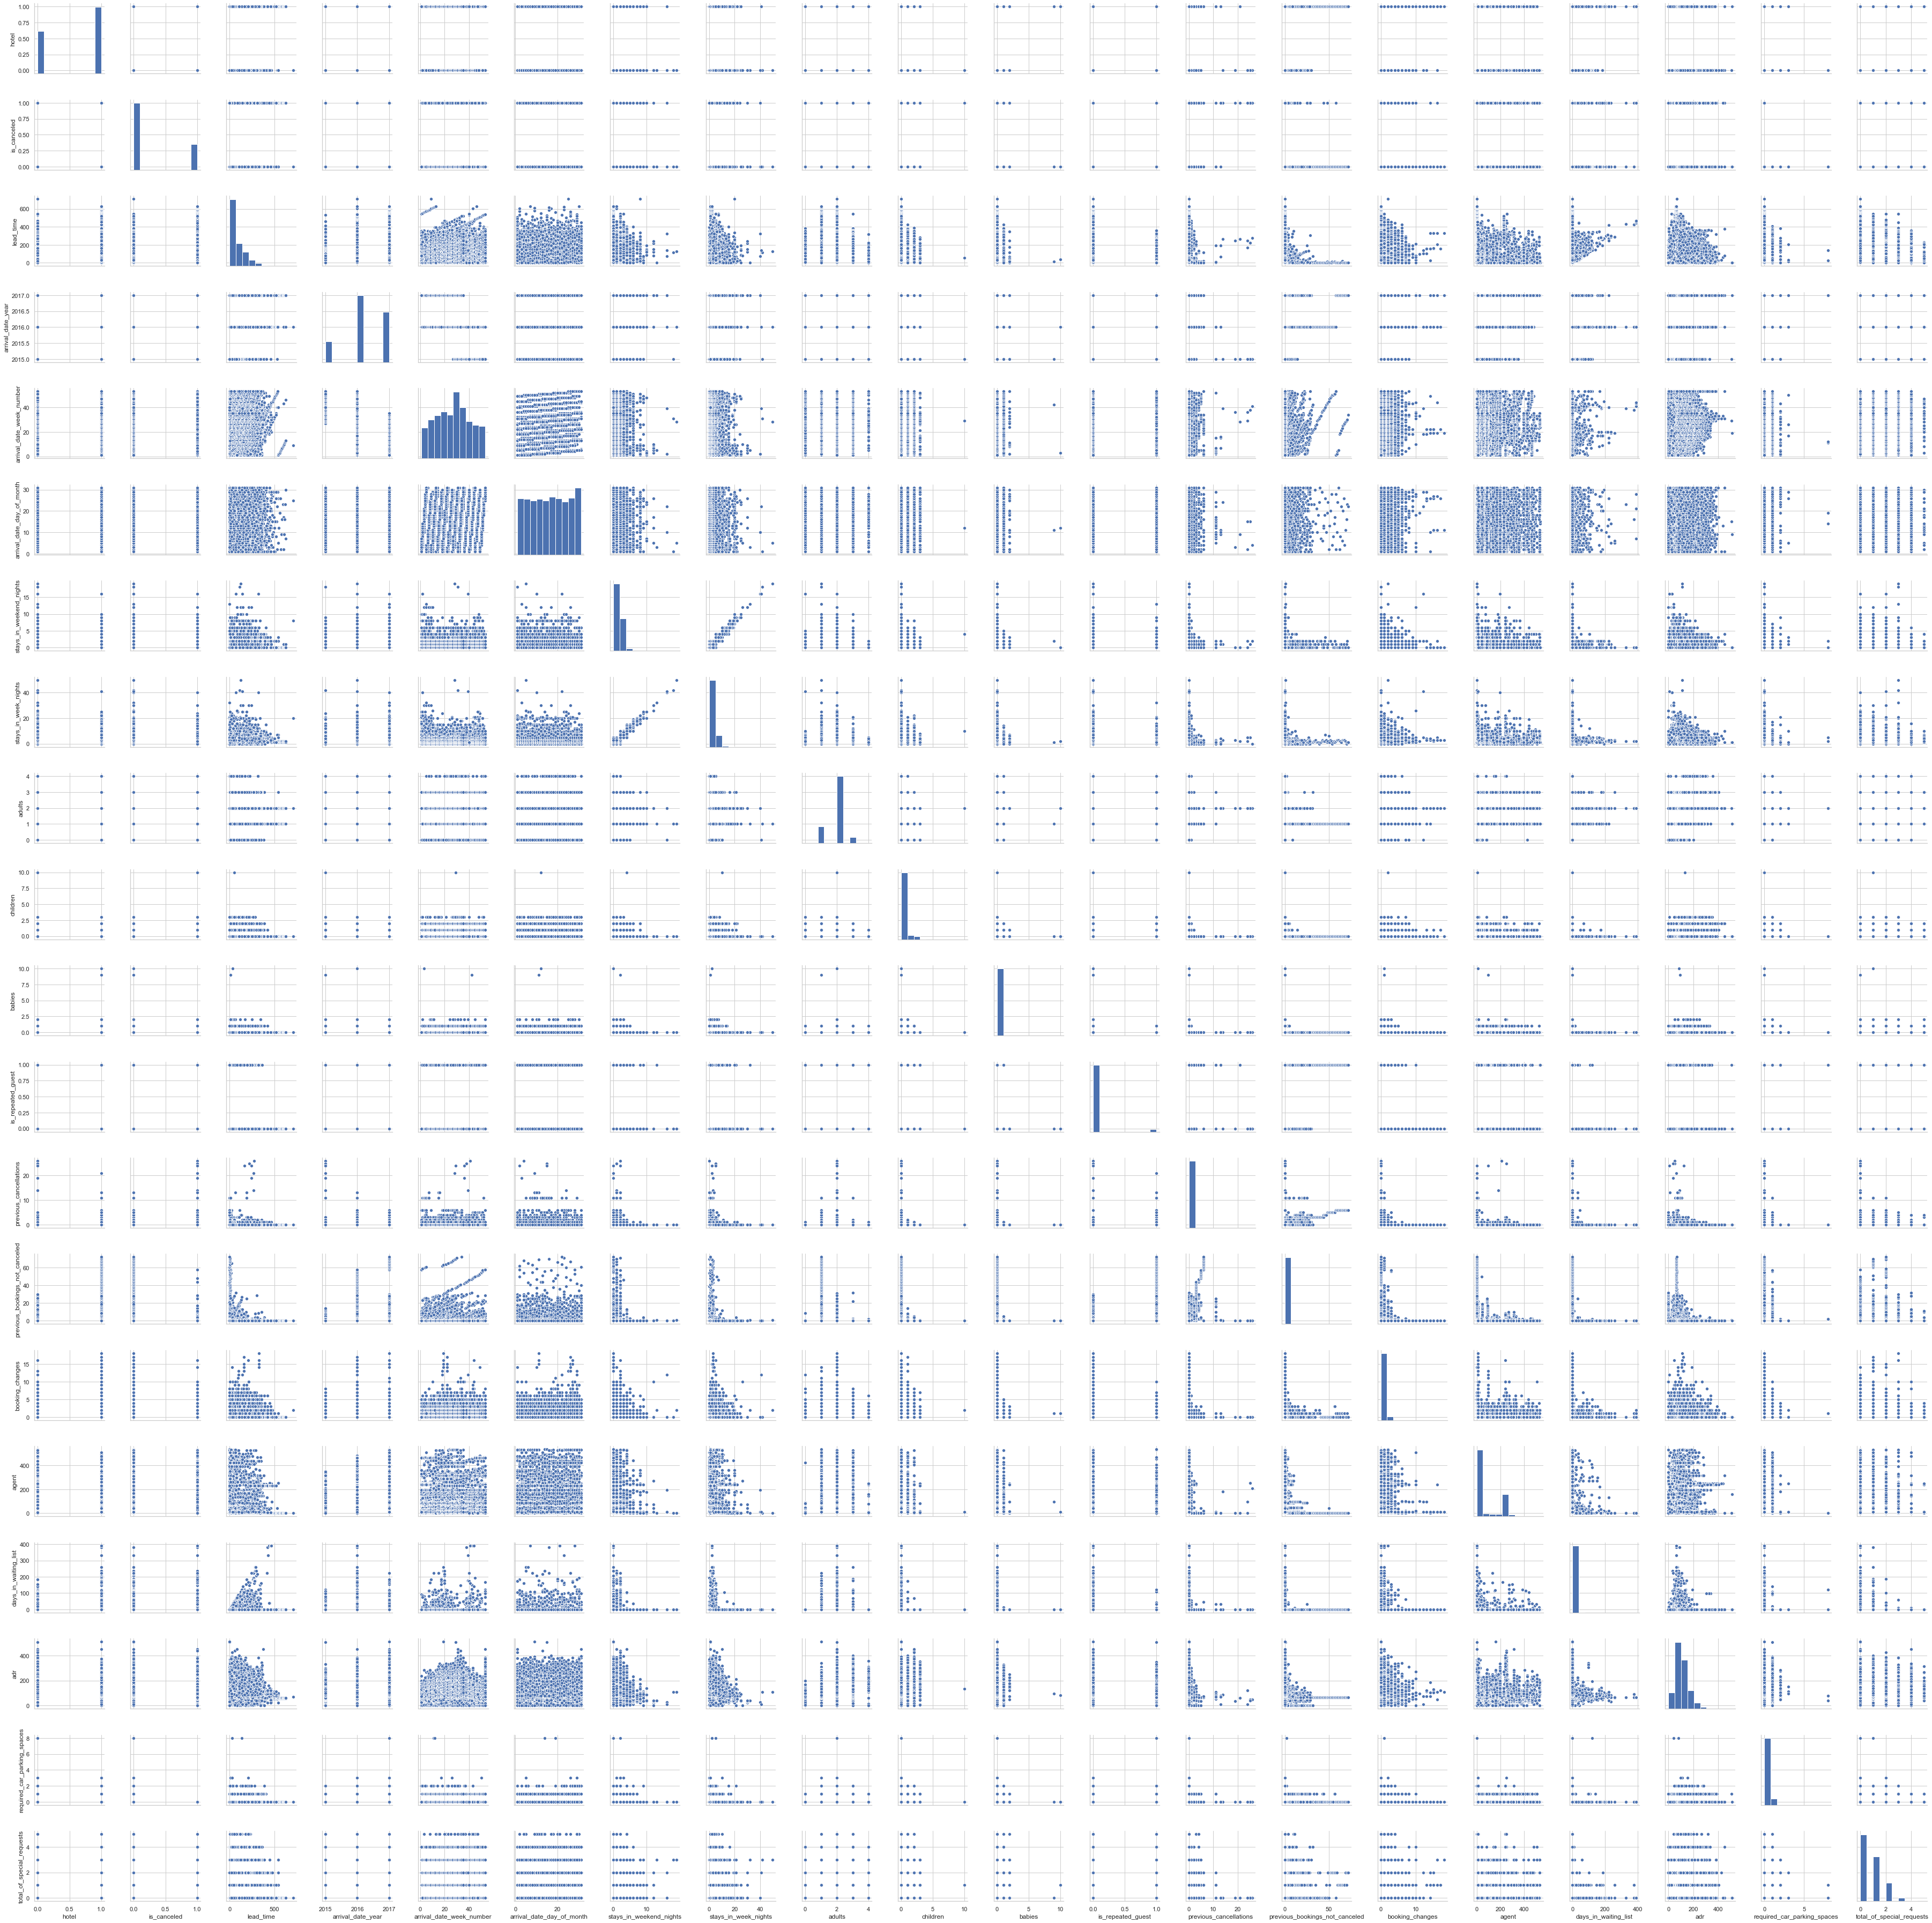

In [65]:
sns.pairplot(bookings[numeric_cols])
plt.show()

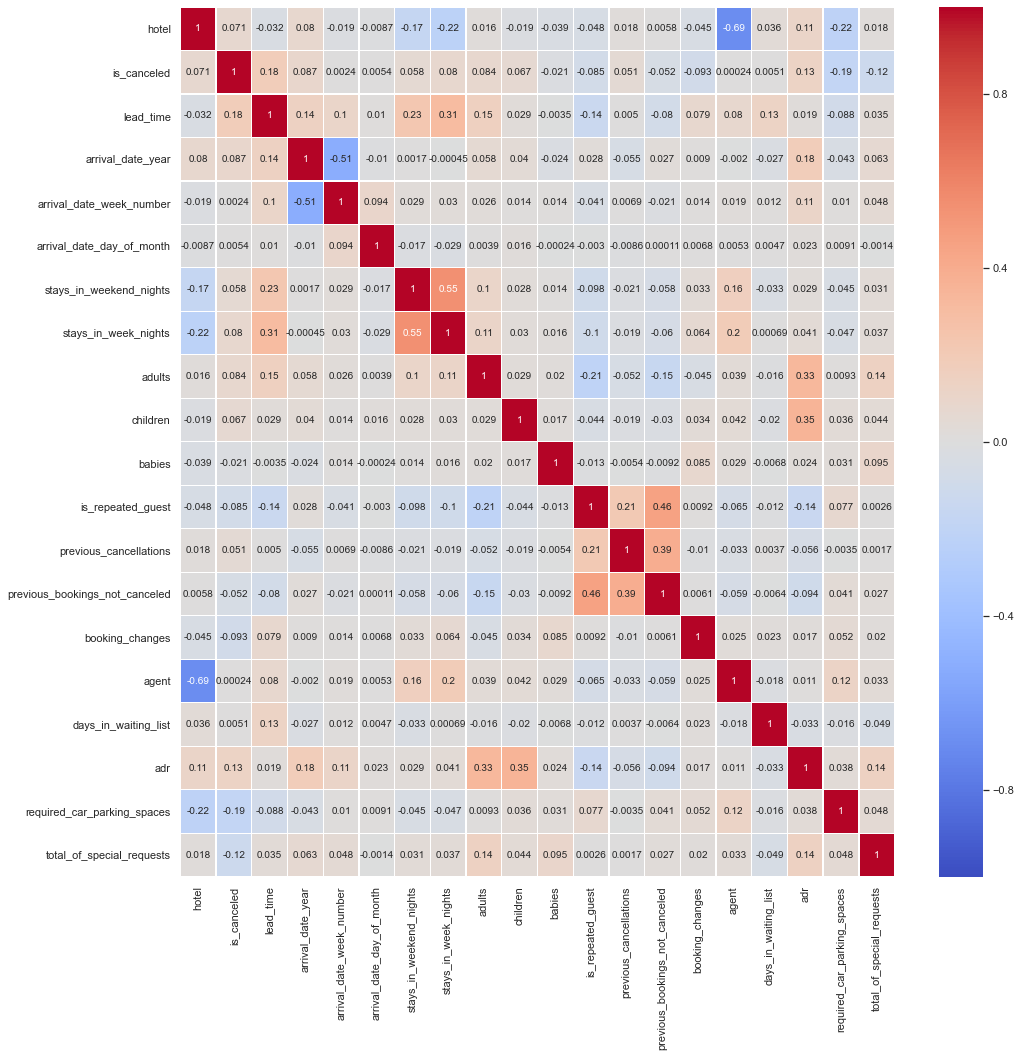

In [66]:
# Make a heatmap of the data 
plt.figure(figsize=(16,16))
sns.heatmap(bookings[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=0.3)
plt.show()

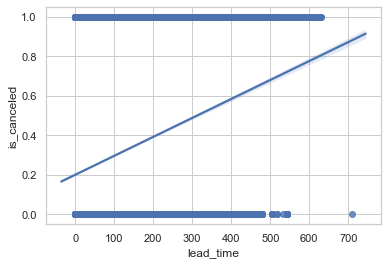

In [67]:
#Not much to go on here. is_canceled does show correlation to lead_time and adr. It'd be interesting how those look like

sns.regplot(x='lead_time', y='is_canceled', data=bookings)

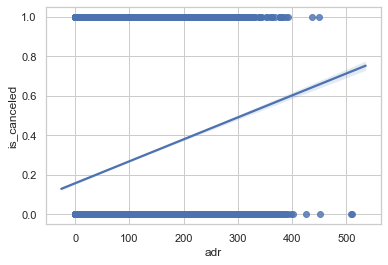

In [68]:
sns.regplot(x='adr', y='is_canceled', data=bookings)

In [70]:
#I think I would have to look into the percentage of cancelations rather than 0 and 1 in order to make sense out of a 
#linear plot like this one. Not sure how to move forward with this one or if it's even worht it. 
#Got it now. I don't think it's the percentages but rather the chance of a cancellation 
bookings['is_canceled'].value_counts(normalize=True)

0    0.72264
1    0.27736
Name: is_canceled, dtype: float64

AttributeError: 'Int64Index' object has no attribute 'mean'

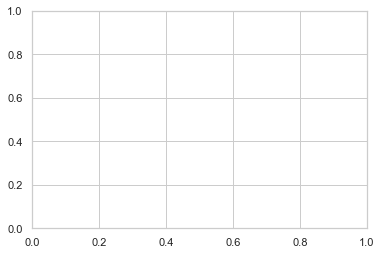

In [86]:
lead_cancel = bookings.groupby('lead_time')['is_canceled'].describe()


sns.regplot(x=lead_cancel.index, y=lead_cancel["mean"].values * 100)

In [84]:
lead_cancel.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')